In [5]:
import pytesseract
from PIL import Image
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [6]:
# img = cv2.imread("sched-mobile.jpeg")
img = cv2.imread("sched.png")
# img = cv2.imread("sched-small.png")

scale = 4
img = cv2.resize(img, None, fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)

thresh = 1400

3352 9336
9
[np.int32(0), np.int32(930), np.int32(1189), np.int32(2449), np.int32(3726), np.int32(4969), np.int32(6229), np.int32(7489), np.int32(9274)]
10
[np.int32(0), np.int32(244), np.int32(553), np.int32(766), np.int32(1065), np.int32(2034), np.int32(2333), np.int32(2670), np.int32(2969), np.int32(3290)]


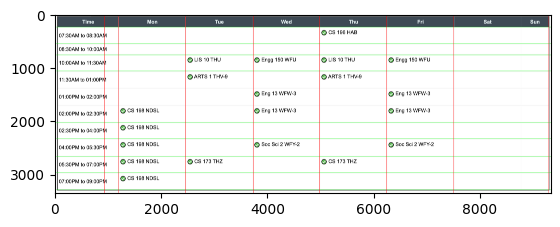

In [7]:
height, width = img.shape[:2]
print(height, width)

# Convert to grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Use canny edge detection
edges = cv2.Canny(gray,50,150,apertureSize=3)

# Use HoughLinesP to detect lines
lines_list =[]
lines = cv2.HoughLinesP(
            edges, # Input edge image
            1, # Distance resolution in pixels
            np.pi/180, # Angle resolution in radians
            threshold=thresh, # Min number of votes for valid line
            # minLineLength=5, # Min allowed length of line
            # maxLineGap=10 # Max allowed gap between line for joining them
            )

x_coords = []
y_coords = []


# limit = min(height, width) * 0.1
limit = 0


for points in lines:
    x1,y1,x2,y2=points[0]

    dx = abs(x2 - x1)
    dy = abs(y2 - y1)

    if dx >= limit:
        y_coords.extend([y1, y2])
    if dy >= limit:
        x_coords.extend([x1, x2])

def dedup_coords(coords, threshold=5):
    result = []
    last = -1000
    for x in coords:
        if abs(x - last) > threshold:
            result.append(x)
            last = x
    return result

x_coords = sorted(x_coords)
cleaned_x_coords = dedup_coords(x_coords, threshold=15)

y_coords = sorted(y_coords)
cleaned_y_coords = dedup_coords(y_coords, threshold=15)

img_grid = img.copy()

cleaned_x_coords.append(np.int32(0))
cleaned_y_coords.append(np.int32(0))

cleaned_x_coords = dedup_coords(sorted(cleaned_x_coords), threshold=50)
cleaned_y_coords = dedup_coords(sorted(cleaned_y_coords), threshold=50)

print(len(cleaned_x_coords))
print(cleaned_x_coords)

print(len(cleaned_y_coords))
print(cleaned_y_coords)

for y in cleaned_y_coords:
    cv2.line(img_grid, (0, y), (width - 1, y), (0, 255, 0), 3)

for x in cleaned_x_coords:
    cv2.line(img_grid, (x, 0), (x, height - 1), (255, 0, 0), 3)

# print(lines_list)
plt.imshow(img_grid)
# plt.axis('off')
plt.show()


In [8]:
# Ensure lines are sorted
x_lines = cleaned_x_coords
y_lines = cleaned_y_coords

cells = []  # store cropped cells

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


# for i in range(len(y_lines) - 1):
#     for j in range(len(x_lines) - 1):
#         x_start = x_lines[j]
#         x_end = x_lines[j + 1]
#         y_start = y_lines[i]
#         y_end = y_lines[i + 1]

#         offset = 3  # or any number of pixels

#         height, width = img.shape[:2]

#         # Clamp to image bounds
#         x1 = max(x_start - offset, 0)
#         y1 = max(y_start - offset, 0)
#         x2 = min(x_end + offset, width)
#         y2 = min(y_end + offset, height)

#         cell = img[y1:y2, x1:x2]
#         cells.append(cell)
#         pro = cv2.resize(cell, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)
#         text = pytesseract.image_to_string(pro)
#         print(text)
#         plt.imshow(pro, cmap='gray')
#         plt.axis('off')
#         plt.show()